<h1>17. More Matplotlib</h1>
<h2>11/17/2023</h2>

<h2>17.0 Last Time...</h2>
<ul>
    <li><b>matplotlib</b>'s <b>pyplot</b> module lets us use Matlab's powerful plotting tools in Python.</li>
    <li>The <b>matplotlib.pyplot.plot()</b> function is a simple way to plot 2-D data.</li>
    <li>We can specify axis limits as well as line style and color.</li>
</ul>

<h2>17.1 Keyword Strings</h2>

With a normal scatterplot, you can convey two pieces of information for each point: (1) what the x value is, and (2) what the y value is. You can get additional information crammed into one plot by allowing the size and color of the points being plotted to vary!

matplotlib.pyplot has a handy function for this particular application called <b>scatter()</b>. By default, you only need two arguments that consist of arrays of your x data and your y data.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


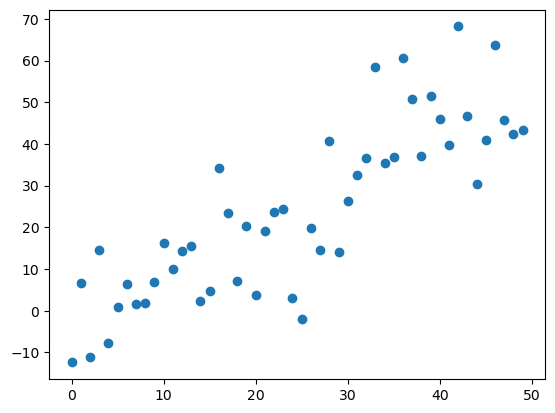

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Let's have our x values just be a count from 0 to 49.
var1 = np.arange(50)
print(var1)

# And let's randomly generate some y values!
var2 = var1 + 10*np.random.randn(50)

plt.scatter(var1,var2)


Okay! So we have some information being shown here: we can see that there's a general positive trend going on here. But what if we have additional information (say this is temperature versus dewpoint temperature and we also know something about relative humidity)? We can convey that information using the 'c' argument in scatter(): the color of the data points.

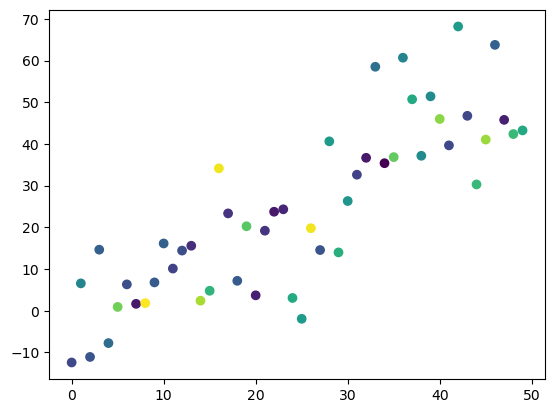

In [3]:
# Now we have a third variable that's a new set of random numbers from 0 to 50.

var3 = 8*np.random.randint(0,50,50)
plt.scatter(var1,var2,c=var3)


More information has been conveyed! Let's try adding even more information - say, a fourth meteorological variable like wind speed - through the size of the circle, which is the 's' argument in scatter(). This marker size is in 'points' squared.

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


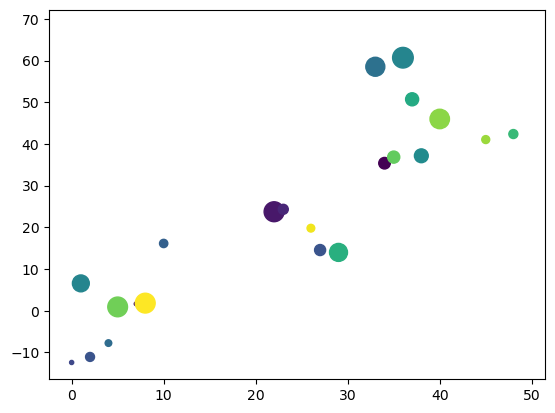

In [4]:
 #This gives random numbers on a N(0,1) Gaussian.
var4 = np.random.randn(50)*100
plt.scatter(var1,var2,c=var3,s=var4)


<h2>17.2 Categorical Variables</h2>

Sometimes you have data in the form of categories! You may have, for instance, two different sets of tornado data (like in Homework 3), or three different future climate regimes, or five different locations. Any sort of comparative research will require this sort of categorical data analysis!

<BarContainer object of 3 artists>

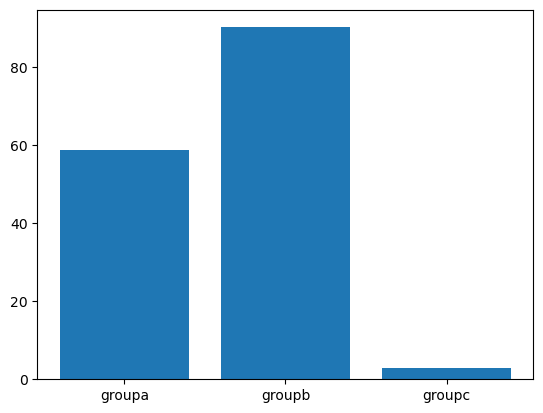

In [5]:
import matplotlib.pyplot as plt
# Let's look at the example of three pieces of data.
# They might be mean values of three parameters, average grades on an assignment, etc.
names = ['groupa','groupb','groupc']
values = [58.9,90.3,3]


# We can start with a bar plot.
plt.bar(names,values)

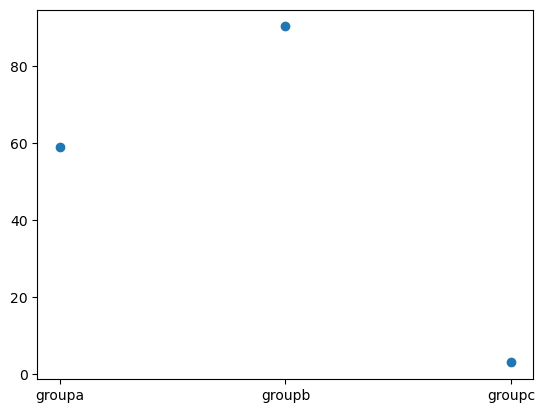

In [6]:
# We can also create a scatterplot as seen above.
plt.scatter(names,values)

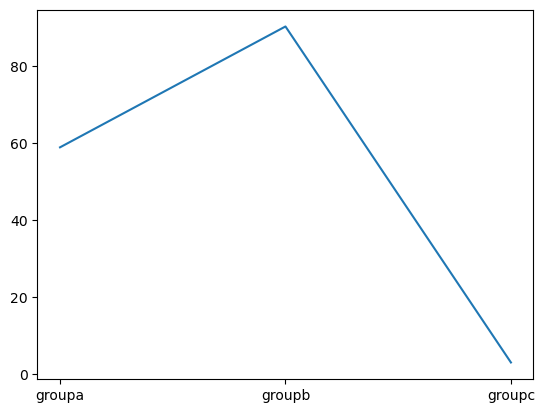

In [7]:
# Or a line plot!
plt.plot(names,values)

<h2>17.3 Controlling Line Properties</h2>

There are a bunch of line attributes you can set! The line type/color/marker examples we saw earlier are shortcuts for common configurations, but there are a <i>lot</i> more. You can find the full list by googling <b>matplotlib.lines.Line2d</b>, or by calling the <b>plt.setp()</b> function with a line or lines as an argument.

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `~matplotlib.figure.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker st

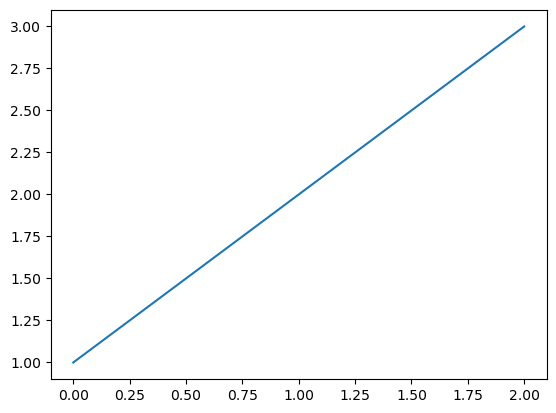

In [8]:
lines = plt.plot([1,2,3])
plt.setp(lines)

Let's say you want to increase the width of a given line. You'd want to use the <b>linewidth</b> argument.

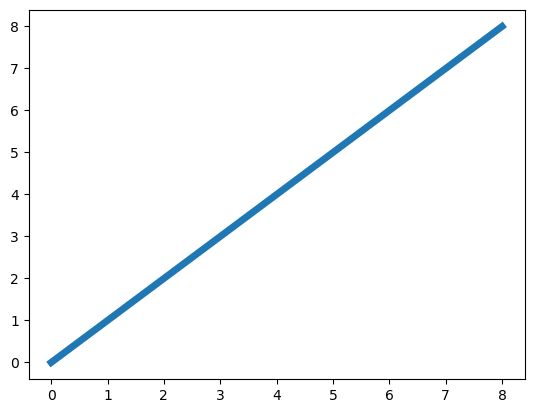

In [9]:
import numpy as np
plt.plot(np.arange(9),linewidth=5.0)

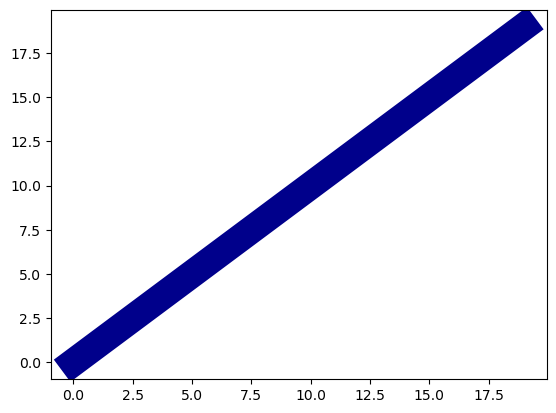

In [10]:
# Likewise, you can set the color.
plt.plot(np.arange(20),linewidth=20,color='darkblue')


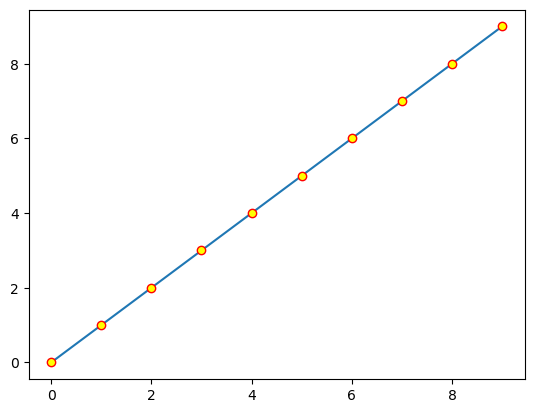

In [11]:
# If you have markers, you can change their properties as well!
plt.plot(np.arange(10),'-o',markeredgecolor='red',markerfacecolor='yellow')

<h2>17.4 Multiple Figures and Axes</h2>

We often want to deal with multiple subplots within the same figure. As a behind-the-scenes note, pyplot keeps track of the "current" figure and axes, which can be referred to using <b>gcf()</b> and <b>gca()</b>, respectively. You probably won't have to worry about this too often.

The <b>subplot()</b> function refers to a particular subplot within a set. It has three arguments: number of rows, number of columns, and then the specific number of this plot (which ranges from 1 to number_rows*number_columns).

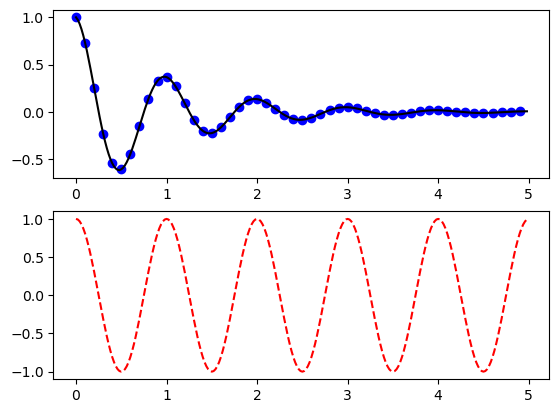

In [12]:
# Let's create a couple of subplots of fairly complex data:
# a damped oscillation and an undamped oscillation.
import numpy as np
# Start by creating a function that will give us a decaying oscillation.
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)


# Next, let's have two sets of x values:
# the first is more widely spaced than the second,
# but they cover the same range of data.
t1 = np.arange(0,5,0.1)
t2 = np.arange(0,5,0.02)


# First, we create a setup where we have two rows and 1 column of
# plots, and we're referring to the first plot.
plt.subplot(2,1,1)
plt.plot(t1,f(t1),'ob',t2,f(t2),'k')

# Next, we'll refer to the second plot.

plt.subplot(2,1,2)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')
plt.show()

<b>Exercise:</b> Make 4 subplots (2 rows, 2 columns) using the x values below and plot whatever functions you like on them (sin(x), cos(x), 2/x, etc.)!

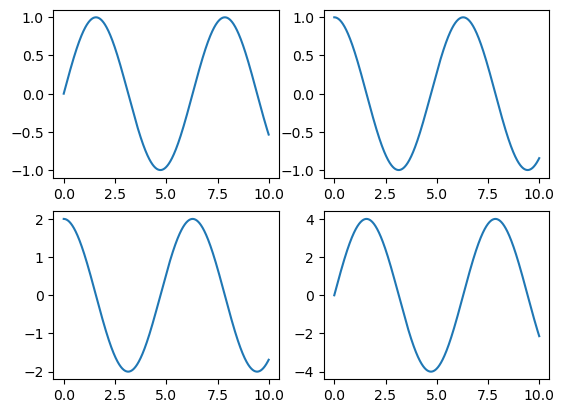

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,10,0.01)

plt.subplot(2,2,1)
plt.plot(x,np.sin(x))
plt.subplot(2,2,2)
plt.plot(x,np.cos(x))
plt.subplot(2,2,3)
plt.plot(x,2*np.cos(x))
plt.subplot(2,2,4)
plt.plot(x,4*np.sin(x))

<h2>17.5 Working with Text</h2>

You can use the <b>text()</b> function to place text in any arbitrary location. As seen above, some useful text-related functions include <b>xlabel()</b>, <b>ylabel()</b>, and <b>title()</b>.

As a side note, if you want to use mathematical expressions in text, it can get a little confusing. You'll want to start your string with the letter r, then surround it with quotation marks followed by dollar signs. The conventions are the same as in LaTeX, and you can find the details by googling 'LaTeX math'.

[41.32270515 86.64818776 48.41249733 ... 39.1275195  74.85441181
 59.70951104]


Text(20, 0.025, '$\\mu=60 \\sigma=15$')

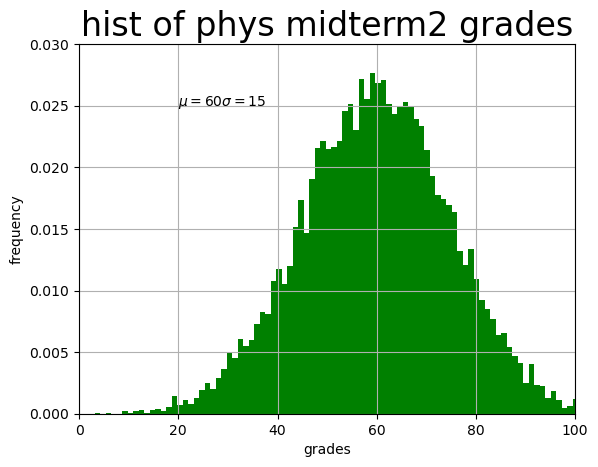

In [68]:
# Let's generate a histogram from a set of random values in a distribution
# with a specified mean and standard deviation.
mu,sigma =60,15
x = mu + sigma *np.random.randn(10000)
print(x)

# Let's create a histogram!
plt.hist(x,100,density=1,facecolor='g')
plt.grid(True)
plt.axis([0,100,0,0.03])
plt.xlabel('grades')
plt.ylabel('frequency')
plt.title('hist of phys midterm2 grades',fontsize=24)
plt.text(20,.025,r"$\mu=60 \sigma=15$")

There's also a method of annotating text that is called, as you might expect, <b>annotate()</b>. An example follows!

(-2.0, 2.0)

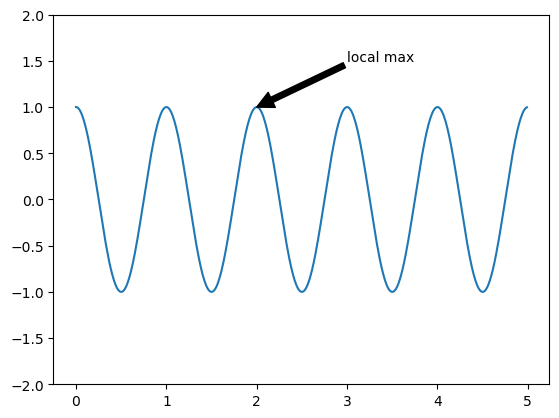

In [72]:
t = np.arange(0,5,.01)
s = np.cos(2*np.pi*t)
plt.plot(t,s)
plt.annotate('local max',xy=(2,1),xytext=(3,1.5),arrowprops=dict(facecolor="black"))
plt.ylim(-2,2)

<h2>17.6 Nonlinear Axes</h2>

If your data spans many orders of magnitude, it can be helpful to create nonlinear axes using <b>xscale()</b> or <b>yscale()</b>.

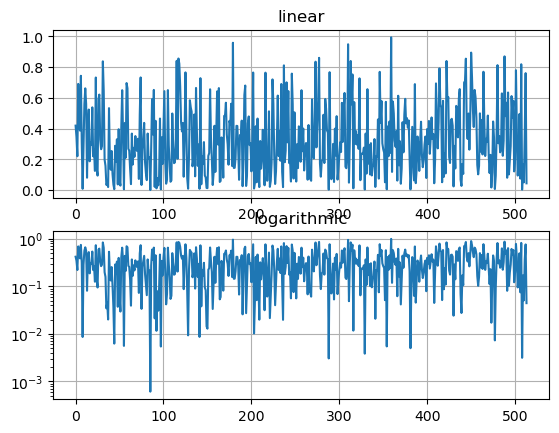

In [81]:
# Let's do something called fixing the random state.
# Typically when you generate random numbers, every time you
# run the code you'll get a different result.
# Setting a particular random seed will ensure that we can reproduce
# the same results every time for demonstration purposes.

np.random.seed(19680801)

# Let's just make up some data in the interval (0,1)
y = np.random.normal(loc=.0,scale=.4,size=1000)
y =y[(y>0) & (y<1)]
x = np.arange(len(y))

plt.subplot(2,1,1)
plt.title('linear')
plt.plot(x,y)
plt.yscale('linear')
plt.grid(True)
plt.subplot(2,1,2)
plt.title("logarithmic")
plt.plot(x,y)
plt.yscale('log')
plt.grid(True)

<h2>17.7 Take-Home Points</h2>
<ul>
    <li>The scatter() function can make use of keyword strings to set the shape and color of points on the plot.</li>
    <li>We can also use categorical variables to plot groups of information.</li>
    <li>There are many line properties that can be edited!</li>
    <li>Subplots can be added using the subplot() function.</li>
    <li>Text can be added or annotated on plots.</li>
    <li>Nonlinear axes can be added using xscale() or yscale().</li>
</ul>